# SurenaIV Offline Walk
* CoM Pattern Generation using DCM 
* 5th order ankle Trajectory
* Geometric IK

Start Simulator and Spawn Robot

In [2]:
import pybullet
import time
import pybullet_data
import numpy as np
from Robot import *
from Ankle import *
from DCM import *

In [21]:
phisycsClient = pybullet.connect(pybullet.GUI)
pybullet.setAdditionalSearchPath(pybullet_data.getDataPath())

In [24]:
pybullet.resetSimulation()
planeID = pybullet.loadURDF("plane.urdf")
pybullet.setGravity(0,0,-9.81)
robotID = pybullet.loadURDF("surena4_1.urdf",
                         [0.0,0.0,0.0],useFixedBase = 0)
pybullet.setRealTimeSimulation(0)

Generate Trajectories

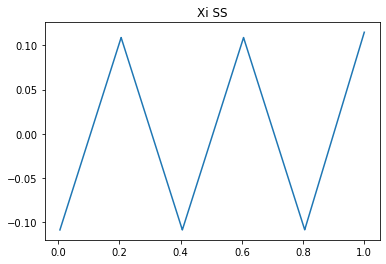

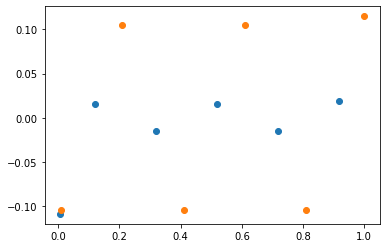

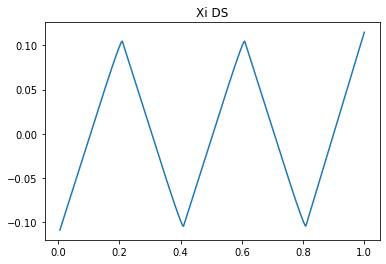

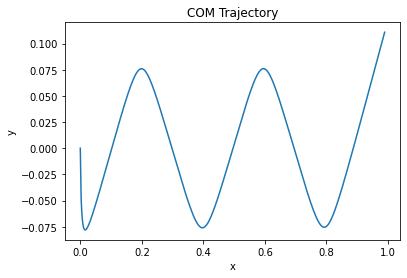

In [18]:
dt = 1/240
planner = DCMPlanner(0.75, 1.0, 0.3,dt)
rF =np.array([[0.0,-0.115,0.0],
             [0.2,0.115,0.0],
             [0.4,-0.115,0.0],
             [0.6,0.115,0.0],
             [0.8,-0.115,0.0],
             [1.0,0.115,0.0]])
planner.setFoot(rF)
xi_trajectory = planner.getXiTrajectory()
com_0 = np.array([0.0,0.0,0.84])
com_trajectory = planner.getCoMTrajectory(com_0)

In [19]:
anklePlanner = Ankle(1.0, 0.3, 0.05,dt)
rF =np.array([[0.0,0.115,0.0],
             [0.0,-0.115,0.0],
             [0.2,0.115,0.0],
             [0.4,-0.115,0.0],
             [0.6,0.115,0.0],
             [0.8,-0.115,0.0],
             [1.0,0.115,0.0],
             [1.0,-0.115,0.0]])
anklePlanner.updateFoot(rF)
anklePlanner.generateTrajectory()
left = np.array(anklePlanner.getTrajectoryL())
right = np.array(anklePlanner.getTrajectoryR())

Spin Offline...

In [15]:
surena = Robot(shank = 0.36, hip = 0.37, pelvis_lengt = 0.115)

In [25]:
for i in range(240 * 6):
    for index in range (6):
        All = surena.doIK(com_trajectory[i], np.eye(3),left[i], np.eye(3),right[i], np.eye(3))
        leftConfig = All[6:12]
        rightConfig = All[0:6]
        pybullet.setJointMotorControl2(bodyIndex=robotID,
                                jointIndex=index,
                                controlMode=pybullet.POSITION_CONTROL,
                                targetPosition = rightConfig[index])
        pybullet.setJointMotorControl2(bodyIndex=robotID,
                                jointIndex=index + 6,
                                controlMode=pybullet.POSITION_CONTROL,
                                      targetPosition = leftConfig[index])
        pybullet.stepSimulation()

In [17]:
pybullet.disconnect()